## Naive Bayes And Text Mining 

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('blogs.csv')
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [54]:
df.size

4000

In [56]:
df.shape

(2000, 2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [60]:
df.describe()

Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100

In [62]:
# Preprocessing the data

In [64]:
# nltk is used for various tasks such as tokenizing words, sentences, removing stopwords, etc.
import nltk

In [66]:
from nltk.corpus import stopwords

In [68]:
from nltk.tokenize import word_tokenize

In [70]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords((common words like 'the', 'is' that don’t add much meaning))
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # To preprocess the function
    return ' '.join(tokens)

In [76]:
# string useful for checking to see if a character, slice, or string contains letters, digits, symbols, etc. 
import string

In [78]:
# Apply preprocessing to the 'Data' column
df['cleaned_data'] = df['Data'].apply(preprocess_text)

In [86]:
df['cleaned_data']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: cleaned_data, Length: 2000, dtype: object

In [88]:
# to convert data into numerical format using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
tfidf=TfidfVectorizer(max_features=5000)

In [92]:
tfidf

TfidfVectorizer(max_features=5000)

In [94]:
# Transform the text data
x = tfidf.fit_transform(df['cleaned_data']).toarray()

In [96]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
y=df['Labels']

In [100]:
y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [102]:
# Naive Bayes Model for Text Classification

In [104]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2) ## splitting the data set

In [108]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.33774788, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
y_train

968          rec.sport.baseball
240     comp.os.ms-windows.misc
819             rec.motorcycles
692                misc.forsale
420       comp.sys.mac.hardware
                 ...           
1130                  sci.crypt
1294            sci.electronics
860             rec.motorcycles
1459                  sci.space
1126                  sci.crypt
Name: Labels, Length: 1600, dtype: object

In [114]:
y_test

1860          talk.politics.misc
353     comp.sys.ibm.pc.hardware
1333                     sci.med
905           rec.sport.baseball
1289             sci.electronics
                  ...           
965           rec.sport.baseball
1284             sci.electronics
1739       talk.politics.mideast
261      comp.os.ms-windows.misc
535               comp.windows.x
Name: Labels, Length: 400, dtype: object

In [116]:
# Train a Naive Bayes classifier

In [118]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
from sklearn.metrics import classification_report, accuracy_score

In [124]:
NB = MultinomialNB()

In [126]:
NB

MultinomialNB()

In [128]:
NB.fit(x_train,y_train)

MultinomialNB()

In [130]:
y_pred=NB.predict(x_test)

In [132]:
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt', 'comp.windows.x',
       'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'rec.autos',
       'comp.graphics', 'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'soc.religion.christian',
       'comp.os.ms-windows.misc', 'rec.sport.baseball',
       'soc.religion.christian', 

In [134]:
# Sentiment Analysis

In [136]:
!pip install -U textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 11.7 MB/s eta 0:00:00


In [138]:
from textblob import TextBlob

In [140]:
# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [142]:
# Applying sentiment analysis 
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [144]:
df['Sentiment']

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
1995    Positive
1996    Positive
1997    Positive
1998    Positive
1999    Positive
Name: Sentiment, Length: 2000, dtype: object

In [146]:
df['Sentiment'].value_counts()

Positive    1543
Negative     457
Name: Sentiment, dtype: int64

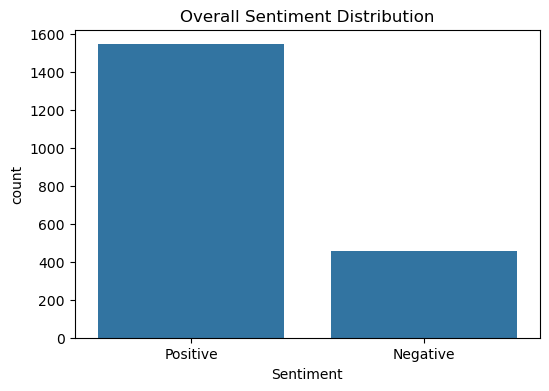

In [164]:
# overall sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment',data=df)
plt.title('Overall Sentiment Distribution')
plt.show()

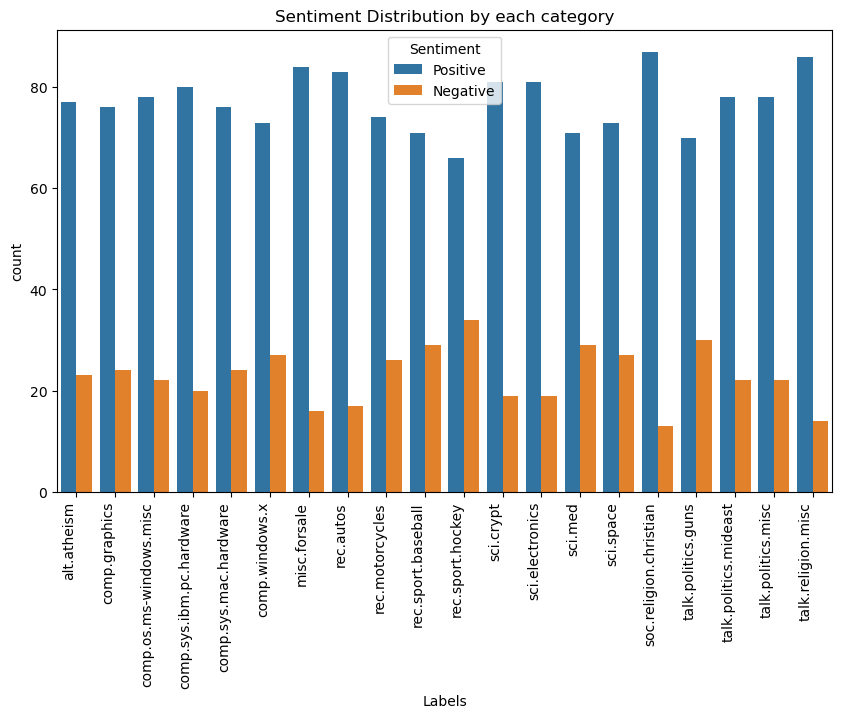

In [168]:
# Sentiment distribution within each category
plt.figure(figsize=(10, 6))
sns.countplot(x='Labels', hue='Sentiment', data=df)
plt.xticks(rotation=90,ha='right') # Rotate x-axis labels for better readability
plt.title('Sentiment Distribution by each category')
plt.show()

In [173]:
#display the distribution of sentiments across different labels in the dataset
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack()
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [175]:
!pip install seaborn wordcloud

In [177]:
from wordcloud import WordCloud

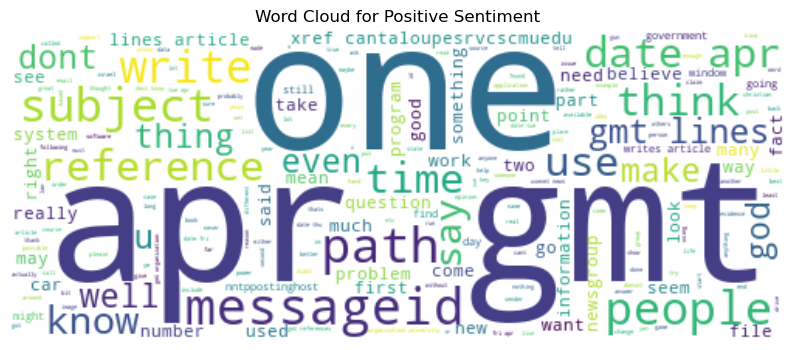

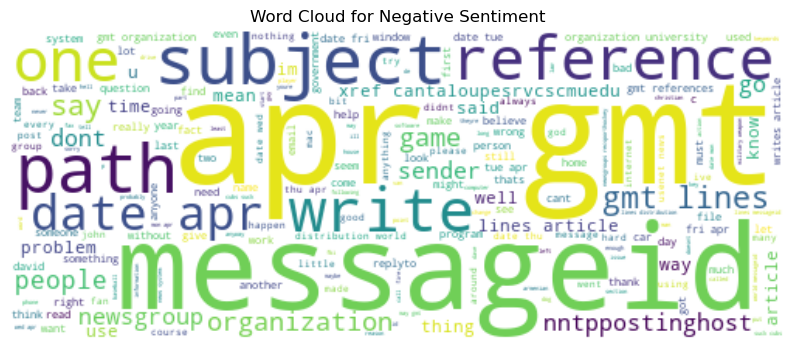

In [181]:
 # Generate word cloud for each sentiment
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

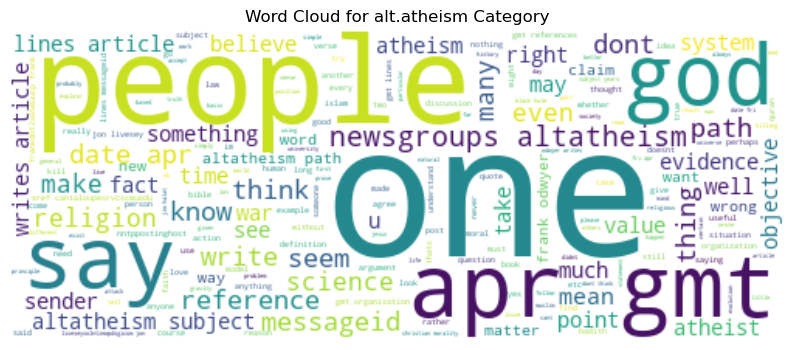

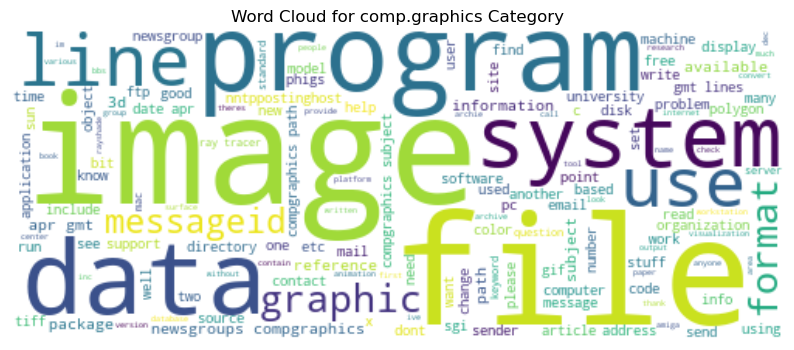

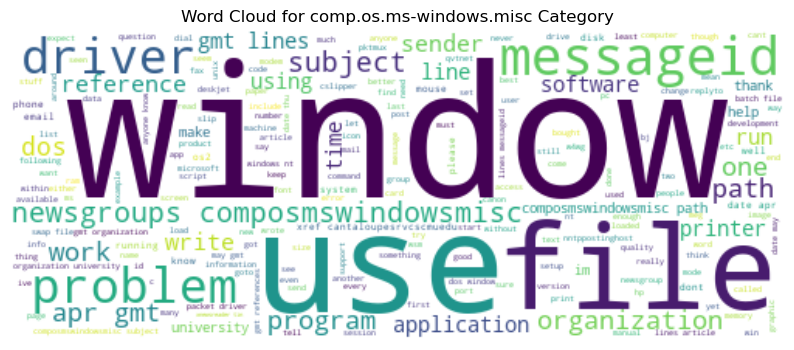

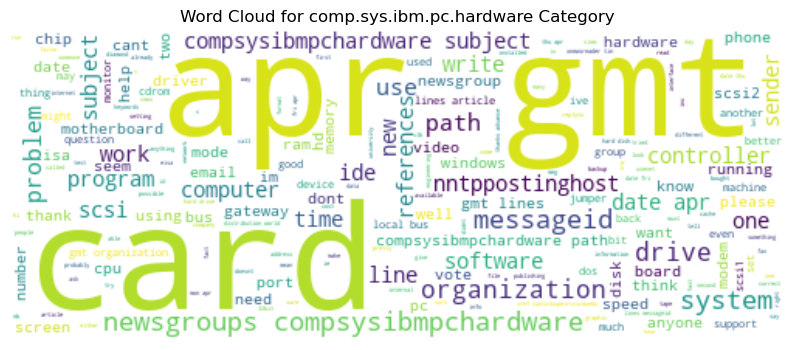

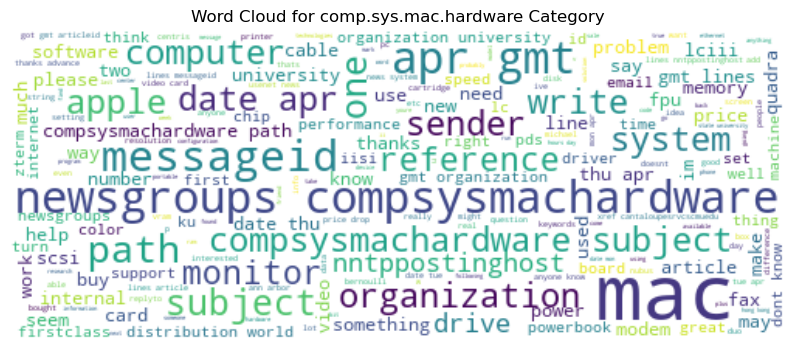

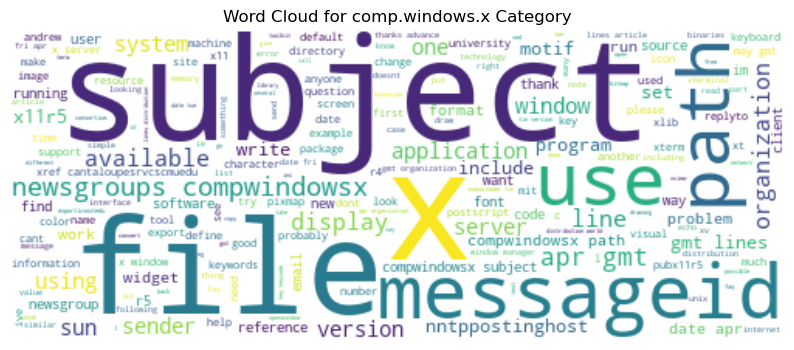

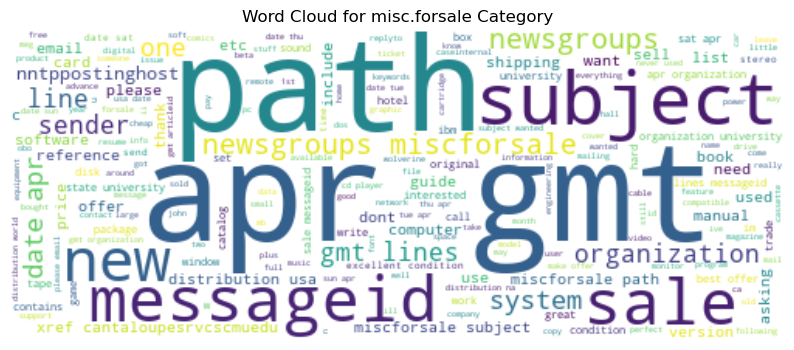

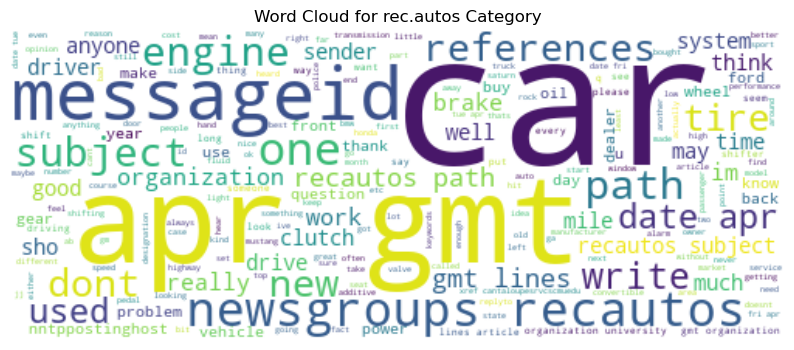

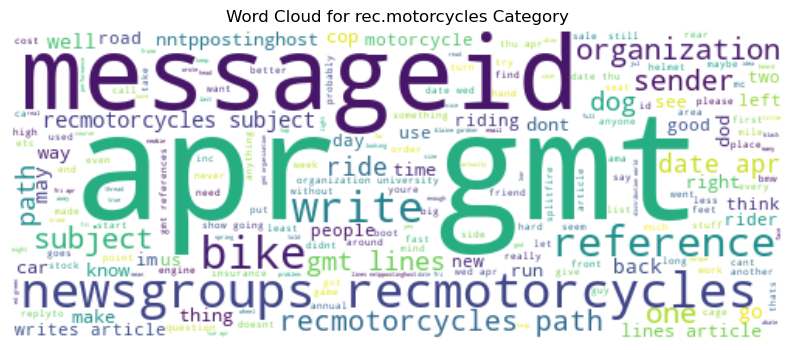

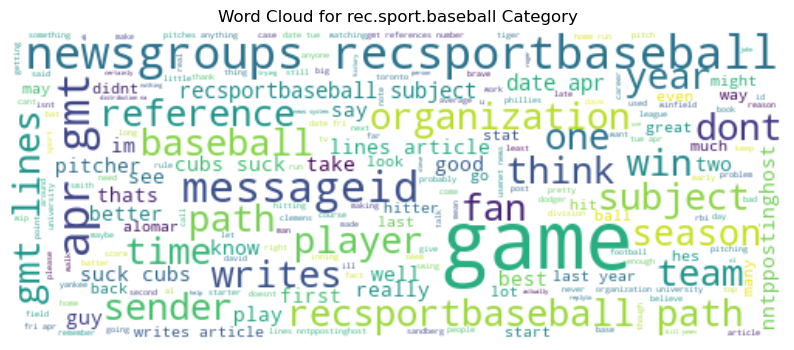

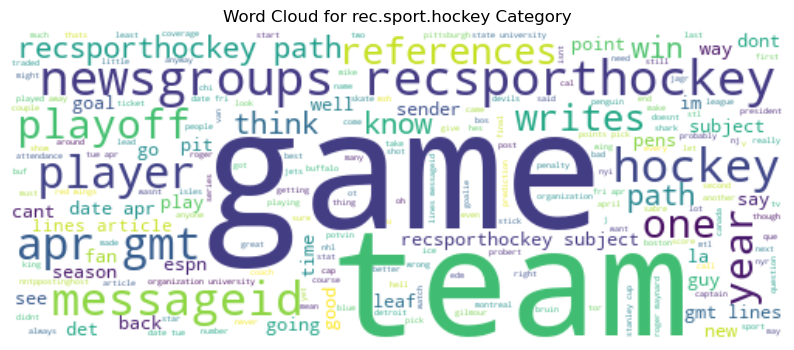

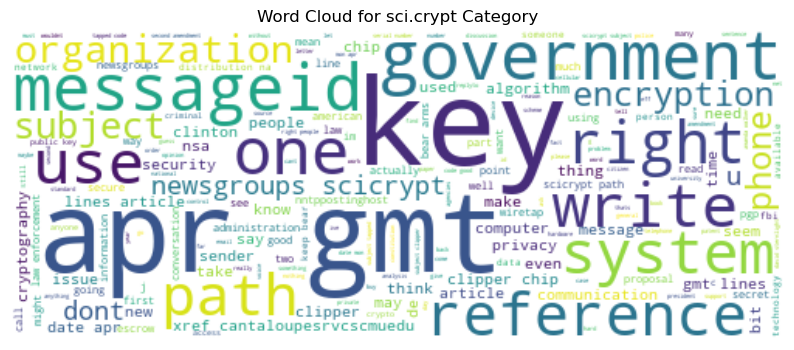

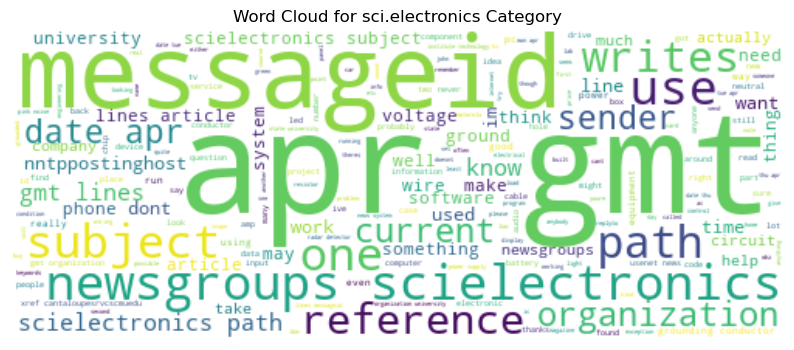

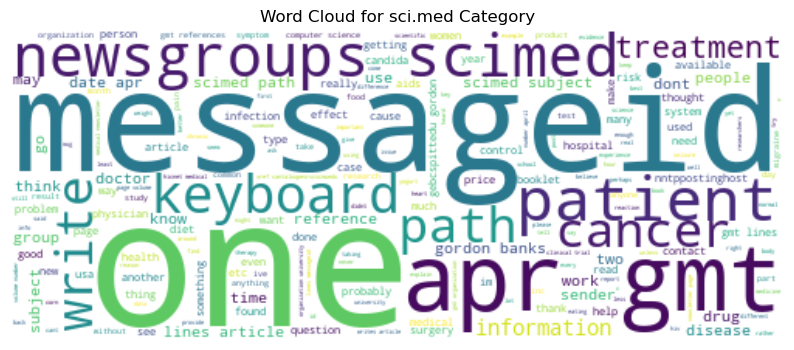

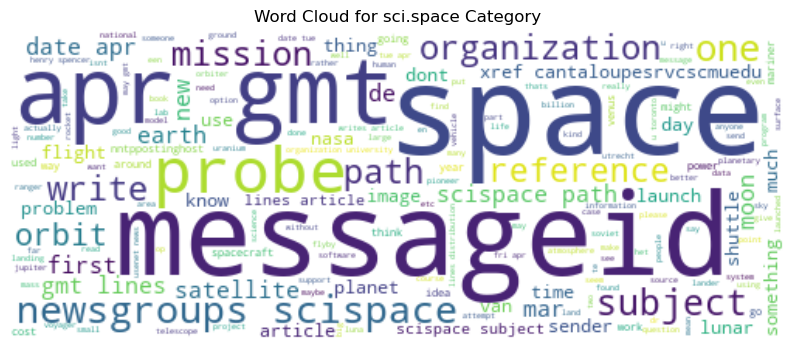

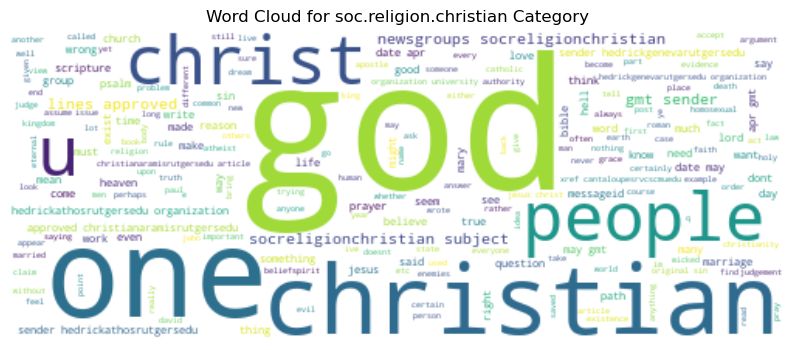

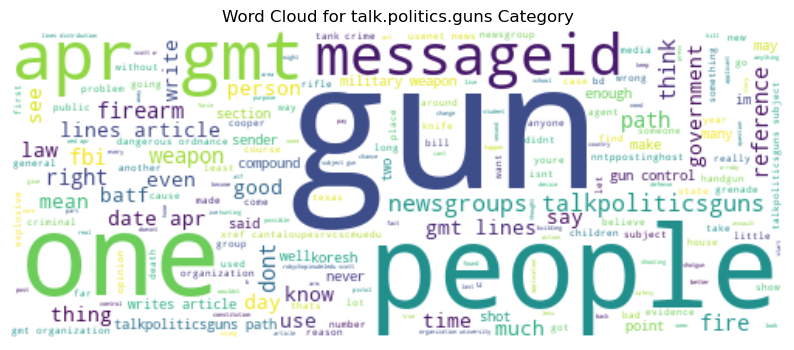

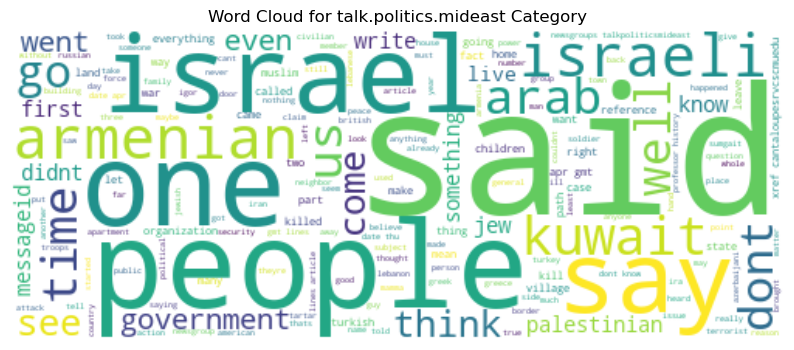

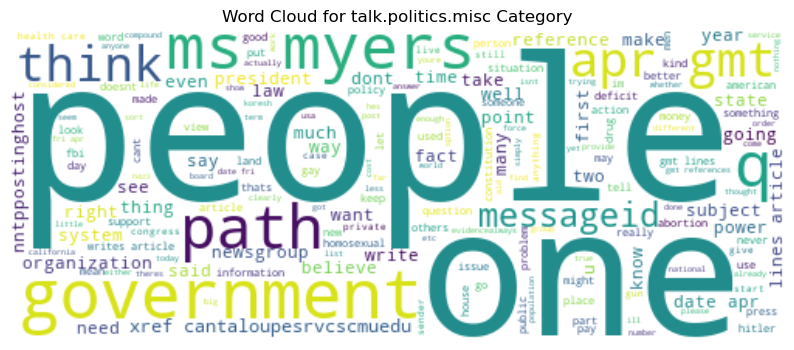

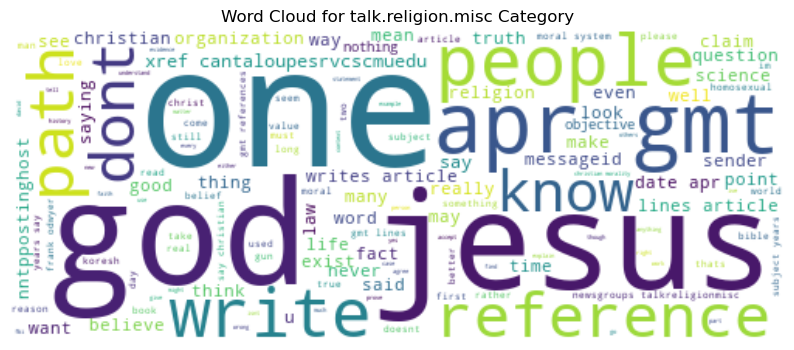

In [183]:
# Generate word cloud for each category
for category in df['Labels'].unique():
    text = ' '.join(df[df['Labels'] == category]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show() 

In [185]:
# Evaluation of model

In [187]:
accuracy_score(y_test, y_pred)

0.8225

In [189]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88        17
         